<a href="https://colab.research.google.com/github/alexgirardet/Analyzing_Rightmove/blob/main/BigQuery_bquxjob_2c5eac33_184f121cd08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'ric-eu-dl-vc-dev-nprd' # Project ID inserted based on the query results selected to explore
location = 'EU' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=ric-eu-dl-vc-dev-nprd:EU:bquxjob_2c5eac33_184f121cd08)
back to BigQuery to edit the query within the BigQuery user interface.

In [2]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_2c5eac33_184f121cd08') # Job ID inserted based on the query results selected to explore
print(job.query)


SELECT 

job_id,
project_id,
user_email,
total_slot_ms,

statement_type,
job_type,

creation_time,

  --- Billing sections  
SAFE_MULTIPLY(total_bytes_billed, 9.09494702E-13) as TB_billed,
SAFE_MULTIPLY(SAFE_MULTIPLY(total_bytes_billed, 9.09494702E-13), 5) as cost_in_dollars,
total_bytes_processed,
total_bytes_billed,

start_time,
end_time,

destination_table.dataset_id as dataset_id


FROM `ric-eu-dl-ops-dev-nprd`.`region-europe`.INFORMATION_SCHEMA.JOBS

-- WHERE
  -- Queries data in the last week to avoid large processing
  -- creation_time BETWEEN TIMESTAMP_SUB(CURRENT_TIMESTAMP(), INTERVAL 1 DAY) AND CURRENT_TIMESTAMP()

Order by total_bytes_billed desc;


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [3]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_2c5eac33_184f121cd08') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,job_id,project_id,user_email,total_slot_ms,statement_type,job_type,creation_time,TB_billed,cost_in_dollars,total_bytes_processed,total_bytes_billed,start_time,end_time,dataset_id
0,62c62048-6701-4ad0-b1f3-bb1ec9e932d3,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,462116287,SCRIPT,QUERY,2022-10-28 01:10:56.353000+00:00,14.678603,73.393016,16139168472638,16139294867456,2022-10-28 01:10:56.621000+00:00,2022-10-28 02:07:11.247000+00:00,None
1,6592d7a3-74ae-4b67-971e-26d4198e97d3,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,507613490,SCRIPT,QUERY,2022-10-27 09:57:02.236000+00:00,14.676291,73.381457,16136618927295,16136753119232,2022-10-27 09:57:02.428000+00:00,2022-10-27 10:54:46.916000+00:00,None
2,725ec133-faa1-48b3-89f5-6d2a92e0a001,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,420063888,SCRIPT,QUERY,2022-10-27 19:11:43.100000+00:00,14.676068,73.380342,16136366975776,16136507752448,2022-10-27 19:11:43.473000+00:00,2022-10-27 20:07:38.214000+00:00,None
3,ce9bdfaa-4325-45a4-bd1a-7d529ed7eafc,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,471063814,SCRIPT,QUERY,2022-10-30 05:24:27.070000+00:00,14.672690,73.363452,16132657342117,16132793696256,2022-10-30 05:24:27.254000+00:00,2022-10-30 06:21:21.916000+00:00,None
4,27a9cfcc-d038-4000-9017-ca71028c600a,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,477124717,SCRIPT,QUERY,2022-10-28 04:22:24.623000+00:00,14.670509,73.352547,16130262703283,16130395602944,2022-10-28 04:22:24.807000+00:00,2022-10-28 05:21:12.362000+00:00,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3556520,664e13ab-d59e-42d9-bb34-9cf298f673d0,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,<NA>,None,QUERY,2022-11-18 17:56:32.973000+00:00,NaN,NaN,<NA>,<NA>,2022-11-18 17:56:33.137000+00:00,2022-11-18 17:56:33.137000+00:00,None
3556521,7460a83d-5ac1-4104-b84e-8f2ffd332d55,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,<NA>,None,QUERY,2022-11-30 09:26:50.075000+00:00,NaN,NaN,<NA>,<NA>,2022-11-30 09:26:50.131000+00:00,2022-11-30 09:26:50.131000+00:00,None
3556522,script_job_5e9703a7b18ca34b0a79d444a6d014c7_2,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,<NA>,MERGE,QUERY,2022-07-27 09:19:50.760000+00:00,NaN,NaN,<NA>,<NA>,2022-07-27 09:19:50.961000+00:00,2022-07-27 09:19:51.190000+00:00,bqdts_customer
3556523,4167ed5b-bffc-4849-a592-765290d01a4f,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,423,MERGE,QUERY,2022-07-15 12:12:44.636000+00:00,NaN,NaN,<NA>,<NA>,2022-07-15 12:12:45.005000+00:00,2022-07-15 12:12:45.962000+00:00,bqdts_narvar


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [4]:
results.describe()

,total_slot_ms,TB_billed,cost_in_dollars,total_bytes_processed,total_bytes_billed
count,3.226684e+06,3.508976e+06,3.508976e+06,3.518902e+06,3.508976e+06
mean,1.101189e+06,6.337515e-03,3.168758e-02,6.946971e+09,6.968172e+09
std,6.080154e+07,8.288682e-02,4.144341e-01,9.100638e+10,9.113502e+10
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.618200e+04,1.907349e-05,9.536743e-05,2.097152e+07,2.097152e+07
max,3.688858e+10,1.467860e+01,7.339302e+01,1.613917e+13,1.613929e+13


# Exploratory Data Analysis

In [8]:
import pandas as pd 
import numpy as np
import seaborn as sb

## Numerical Analysis

In [19]:
results['duration'] = results['end_time'] - results['start_time']
results['seconds'] = results['duration'].dt.seconds

In [20]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3556525 entries, 0 to 3556524
Data columns (total 16 columns):
 #   Column                 Dtype              
---  ------                 -----              
 0   job_id                 object             
 1   project_id             object             
 2   user_email             object             
 3   total_slot_ms          Int64              
 4   statement_type         object             
 5   job_type               object             
 6   creation_time          datetime64[ns, UTC]
 7   TB_billed              float64            
 8   cost_in_dollars        float64            
 9   total_bytes_processed  Int64              
 10  total_bytes_billed     Int64              
 11  start_time             datetime64[ns, UTC]
 12  end_time               datetime64[ns, UTC]
 13  dataset_id             object             
 14  duration               timedelta64[ns]    
 15  seconds                int64              
dtypes: Int64(3), datet

In [23]:
results.head()

,job_id,project_id,user_email,total_slot_ms,statement_type,job_type,creation_time,TB_billed,cost_in_dollars,total_bytes_processed,total_bytes_billed,start_time,end_time,dataset_id,duration,seconds
0,62c62048-6701-4ad0-b1f3-bb1ec9e932d3,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,462116287,SCRIPT,QUERY,2022-10-28 01:10:56.353000+00:00,14.678603,73.393016,16139168472638,16139294867456,2022-10-28 01:10:56.621000+00:00,2022-10-28 02:07:11.247000+00:00,None,0 days 00:56:14.626000,3374
1,6592d7a3-74ae-4b67-971e-26d4198e97d3,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,507613490,SCRIPT,QUERY,2022-10-27 09:57:02.236000+00:00,14.676291,73.381457,16136618927295,16136753119232,2022-10-27 09:57:02.428000+00:00,2022-10-27 10:54:46.916000+00:00,None,0 days 00:57:44.488000,3464
2,725ec133-faa1-48b3-89f5-6d2a92e0a001,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,420063888,SCRIPT,QUERY,2022-10-27 19:11:43.100000+00:00,14.676068,73.380342,16136366975776,16136507752448,2022-10-27 19:11:43.473000+00:00,2022-10-27 20:07:38.214000+00:00,None,0 days 00:55:54.741000,3354
3,ce9bdfaa-4325-45a4-bd1a-7d529ed7eafc,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,471063814,SCRIPT,QUERY,2022-10-30 05:24:27.070000+00:00,14.672690,73.363452,16132657342117,16132793696256,2022-10-30 05:24:27.254000+00:00,2022-10-30 06:21:21.916000+00:00,None,0 days 00:56:54.662000,3414
4,27a9cfcc-d038-4000-9017-ca71028c600a,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,477124717,SCRIPT,QUERY,2022-10-28 04:22:24.623000+00:00,14.670509,73.352547,16130262703283,16130395602944,2022-10-28 04:22:24.807000+00:00,2022-10-28 05:21:12.362000+00:00,None,0 days 00:58:47.555000,3527


In [21]:
corr = results.corr()

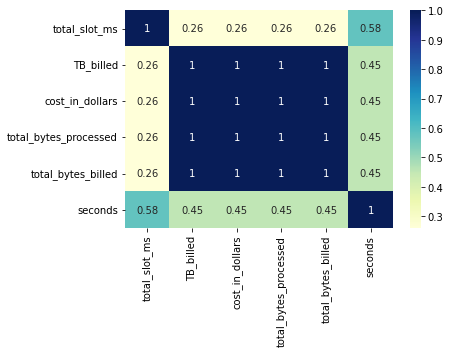

In [22]:
dataplot = sb.heatmap(corr, cmap="YlGnBu", annot=True)

In [65]:
results

,job_id,project_id,user_email,total_slot_ms,statement_type,job_type,creation_time,TB_billed,cost_in_dollars,total_bytes_processed,total_bytes_billed,start_time,end_time,dataset_id,duration,seconds
0,62c62048-6701-4ad0-b1f3-bb1ec9e932d3,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,462116287,SCRIPT,QUERY,2022-10-28 01:10:56.353000+00:00,14.678603,73.393016,16139168472638,16139294867456,2022-10-28 01:10:56.621000+00:00,2022-10-28 02:07:11.247000+00:00,None,0 days 00:56:14.626000,3374
1,6592d7a3-74ae-4b67-971e-26d4198e97d3,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,507613490,SCRIPT,QUERY,2022-10-27 09:57:02.236000+00:00,14.676291,73.381457,16136618927295,16136753119232,2022-10-27 09:57:02.428000+00:00,2022-10-27 10:54:46.916000+00:00,None,0 days 00:57:44.488000,3464
2,725ec133-faa1-48b3-89f5-6d2a92e0a001,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,420063888,SCRIPT,QUERY,2022-10-27 19:11:43.100000+00:00,14.676068,73.380342,16136366975776,16136507752448,2022-10-27 19:11:43.473000+00:00,2022-10-27 20:07:38.214000+00:00,None,0 days 00:55:54.741000,3354
3,ce9bdfaa-4325-45a4-bd1a-7d529ed7eafc,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,471063814,SCRIPT,QUERY,2022-10-30 05:24:27.070000+00:00,14.672690,73.363452,16132657342117,16132793696256,2022-10-30 05:24:27.254000+00:00,2022-10-30 06:21:21.916000+00:00,None,0 days 00:56:54.662000,3414
4,27a9cfcc-d038-4000-9017-ca71028c600a,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,477124717,SCRIPT,QUERY,2022-10-28 04:22:24.623000+00:00,14.670509,73.352547,16130262703283,16130395602944,2022-10-28 04:22:24.807000+00:00,2022-10-28 05:21:12.362000+00:00,None,0 days 00:58:47.555000,3527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3556520,664e13ab-d59e-42d9-bb34-9cf298f673d0,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,<NA>,None,QUERY,2022-11-18 17:56:32.973000+00:00,NaN,NaN,<NA>,<NA>,2022-11-18 17:56:33.137000+00:00,2022-11-18 17:56:33.137000+00:00,None,0 days 00:00:00,0
3556521,7460a83d-5ac1-4104-b84e-8f2ffd332d55,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,<NA>,None,QUERY,2022-11-30 09:26:50.075000+00:00,NaN,NaN,<NA>,<NA>,2022-11-30 09:26:50.131000+00:00,2022-11-30 09:26:50.131000+00:00,None,0 days 00:00:00,0
3556522,script_job_5e9703a7b18ca34b0a79d444a6d014c7_2,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,<NA>,MERGE,QUERY,2022-07-27 09:19:50.760000+00:00,NaN,NaN,<NA>,<NA>,2022-07-27 09:19:50.961000+00:00,2022-07-27 09:19:51.190000+00:00,bqdts_customer,0 days 00:00:00.229000,0
3556523,4167ed5b-bffc-4849-a592-765290d01a4f,ric-eu-dl-ops-dev-nprd,sa-composer-sbx@ric-eu-dl-ops-dev-nprd.iam.gse...,423,MERGE,QUERY,2022-07-15 12:12:44.636000+00:00,NaN,NaN,<NA>,<NA>,2022-07-15 12:12:45.005000+00:00,2022-07-15 12:12:45.962000+00:00,bqdts_narvar,0 days 00:00:00.957000,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd1978abe0>,
      dtype=object)

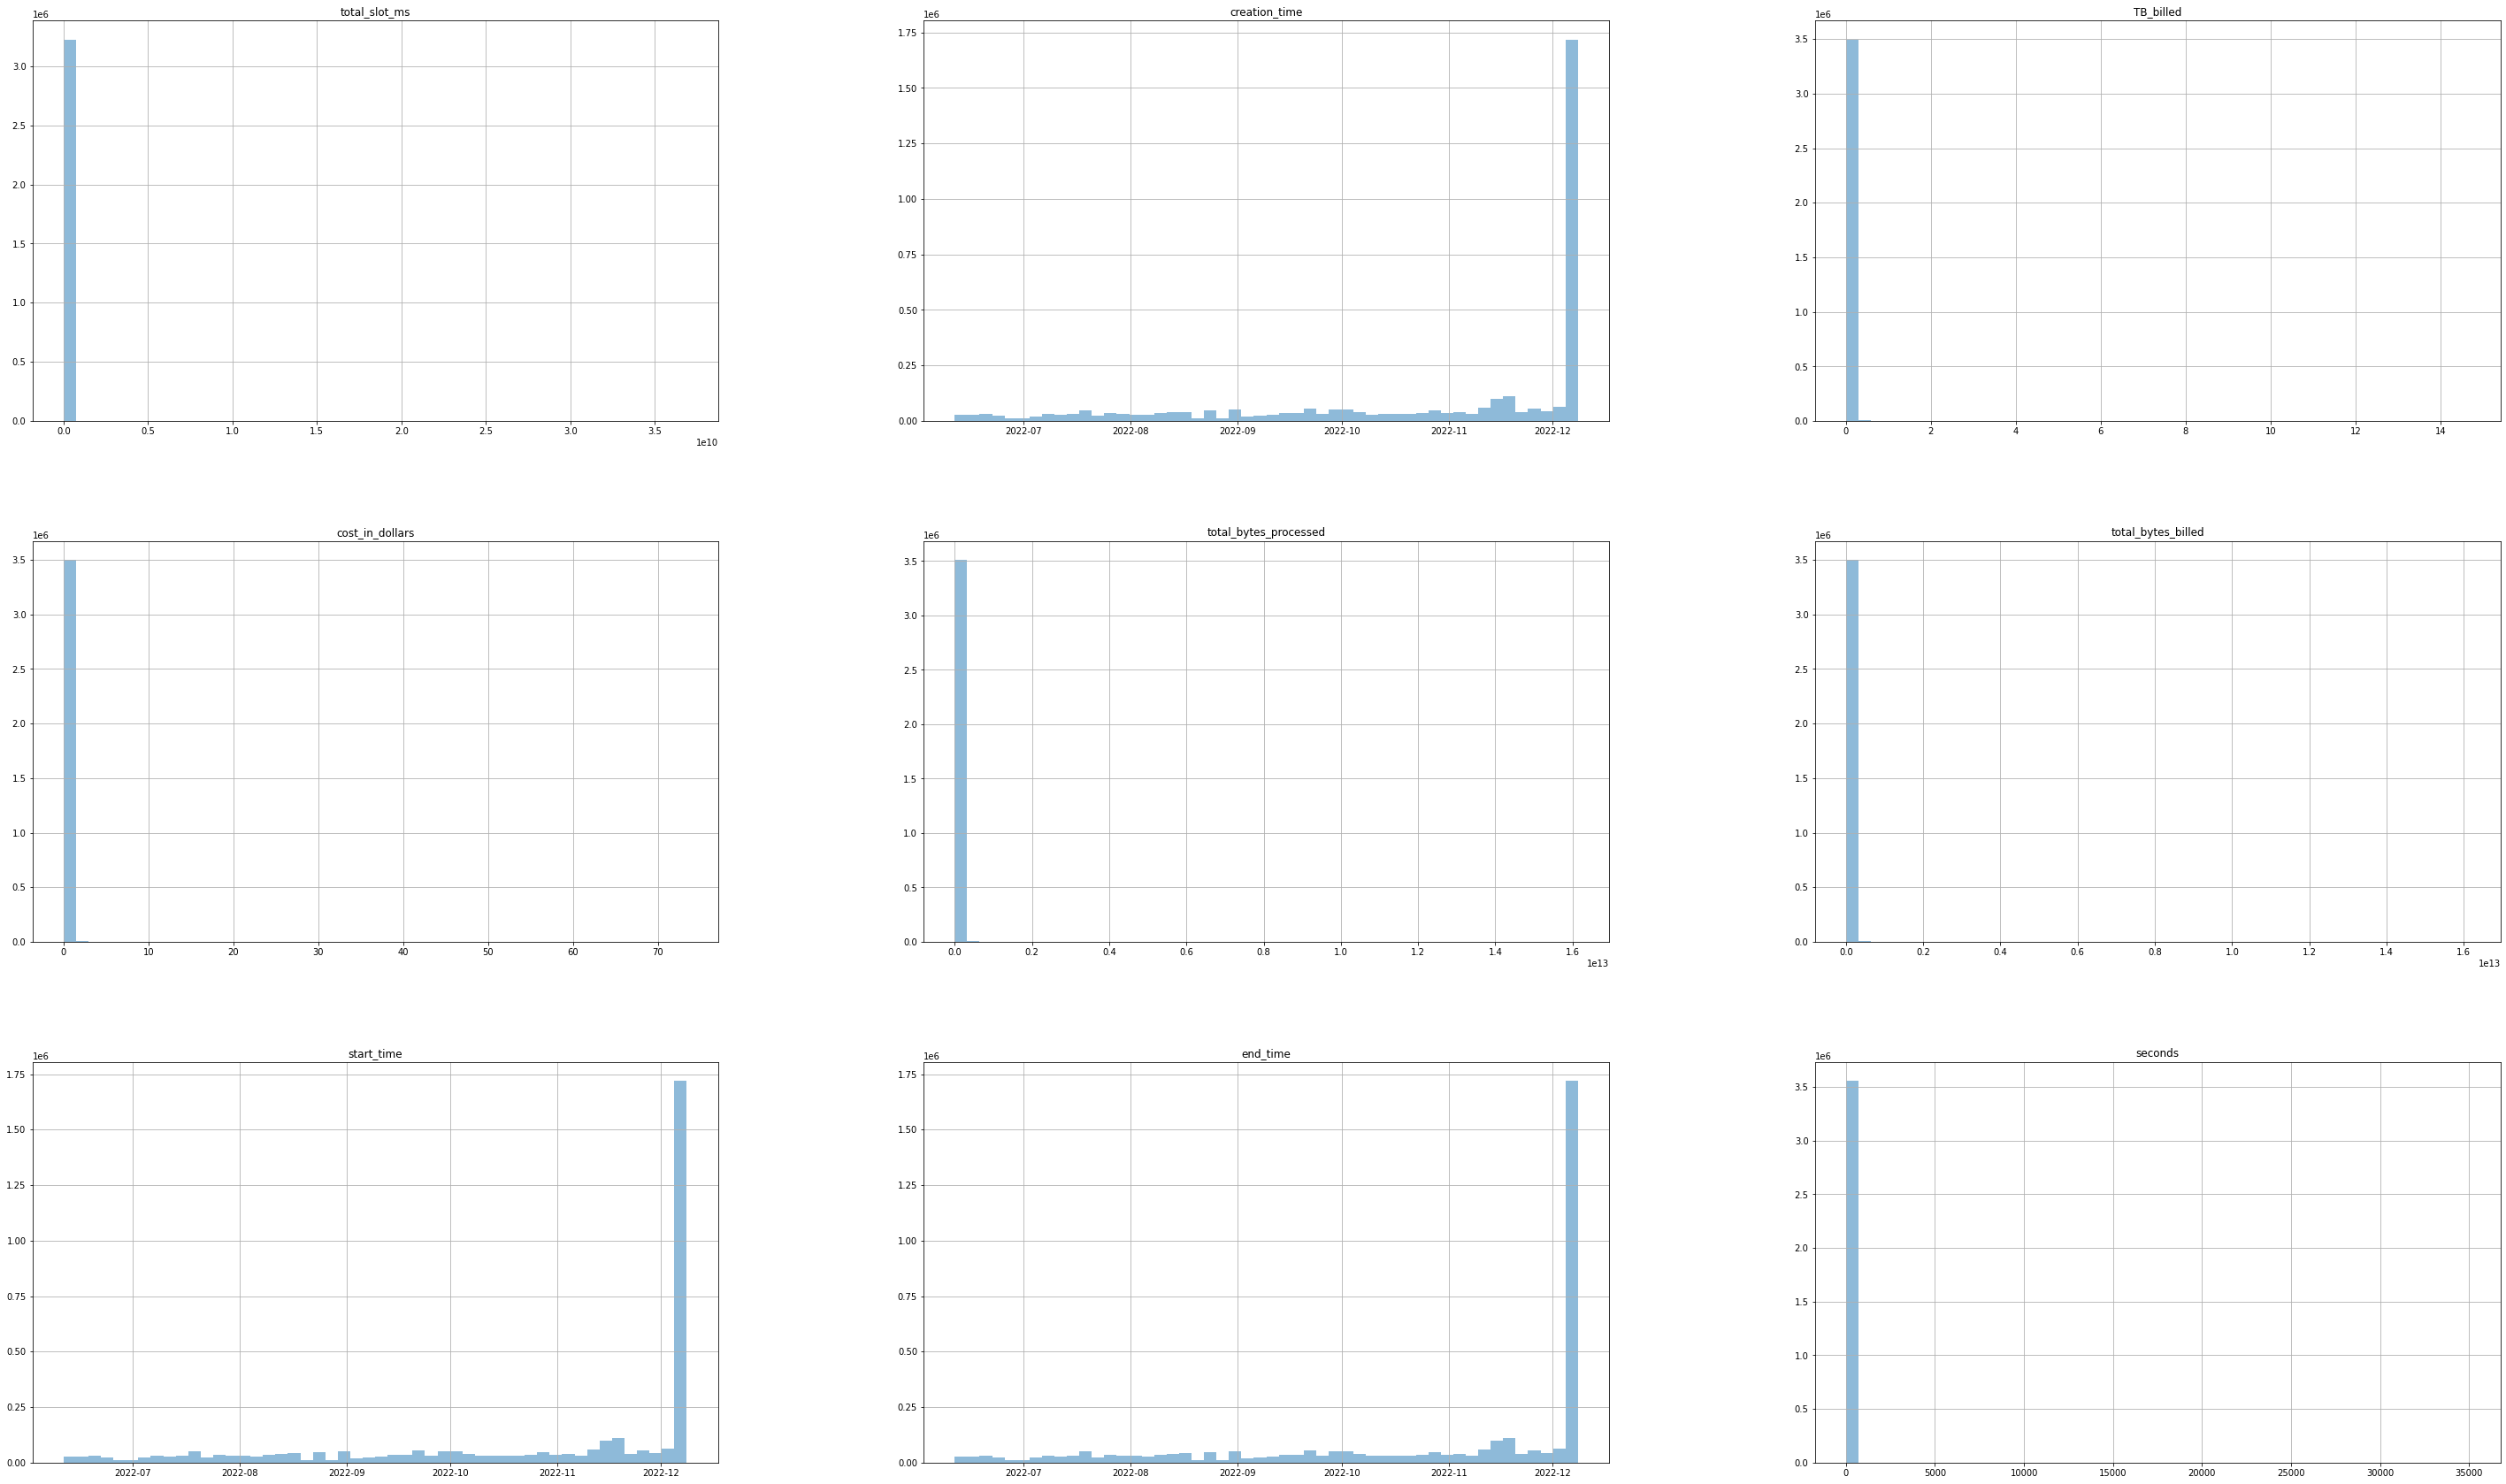

In [64]:
results.hist(bins=50, alpha=0.5, figsize=(50, 30))

## Categorical analysis

In [31]:
categories = ['job_type', 'statement_type', 'cost_in_dollars']

In [27]:
results['job_type'].unique()

array(['QUERY', 'LOAD', 'EXTRACT', 'COPY'], dtype=object)

In [28]:
results['statement_type'].unique()

array(['SCRIPT', 'CREATE_TABLE_AS_SELECT', 'SELECT', 'MERGE', 'DELETE',
       'INSERT', 'UPDATE', 'CREATE_EXTERNAL_TABLE', 'CREATE_TABLE',
       'DROP_TABLE', 'CREATE_VIEW', 'TRUNCATE_TABLE',
       'CREATE_MATERIALIZED_VIEW', 'ALTER_TABLE', 'DROP_SCHEMA',
       'DROP_EXTERNAL_TABLE', 'CREATE_FUNCTION', 'CREATE_SCHEMA',
       'DROP_MATERIALIZED_VIEW', None], dtype=object)

In [57]:
ohe = pd.get_dummies(results[['job_type', 'statement_type']])

In [58]:
ohe['total_bytes_processed'] = results['total_bytes_processed']

In [59]:
ohe_corr = ohe.corr()

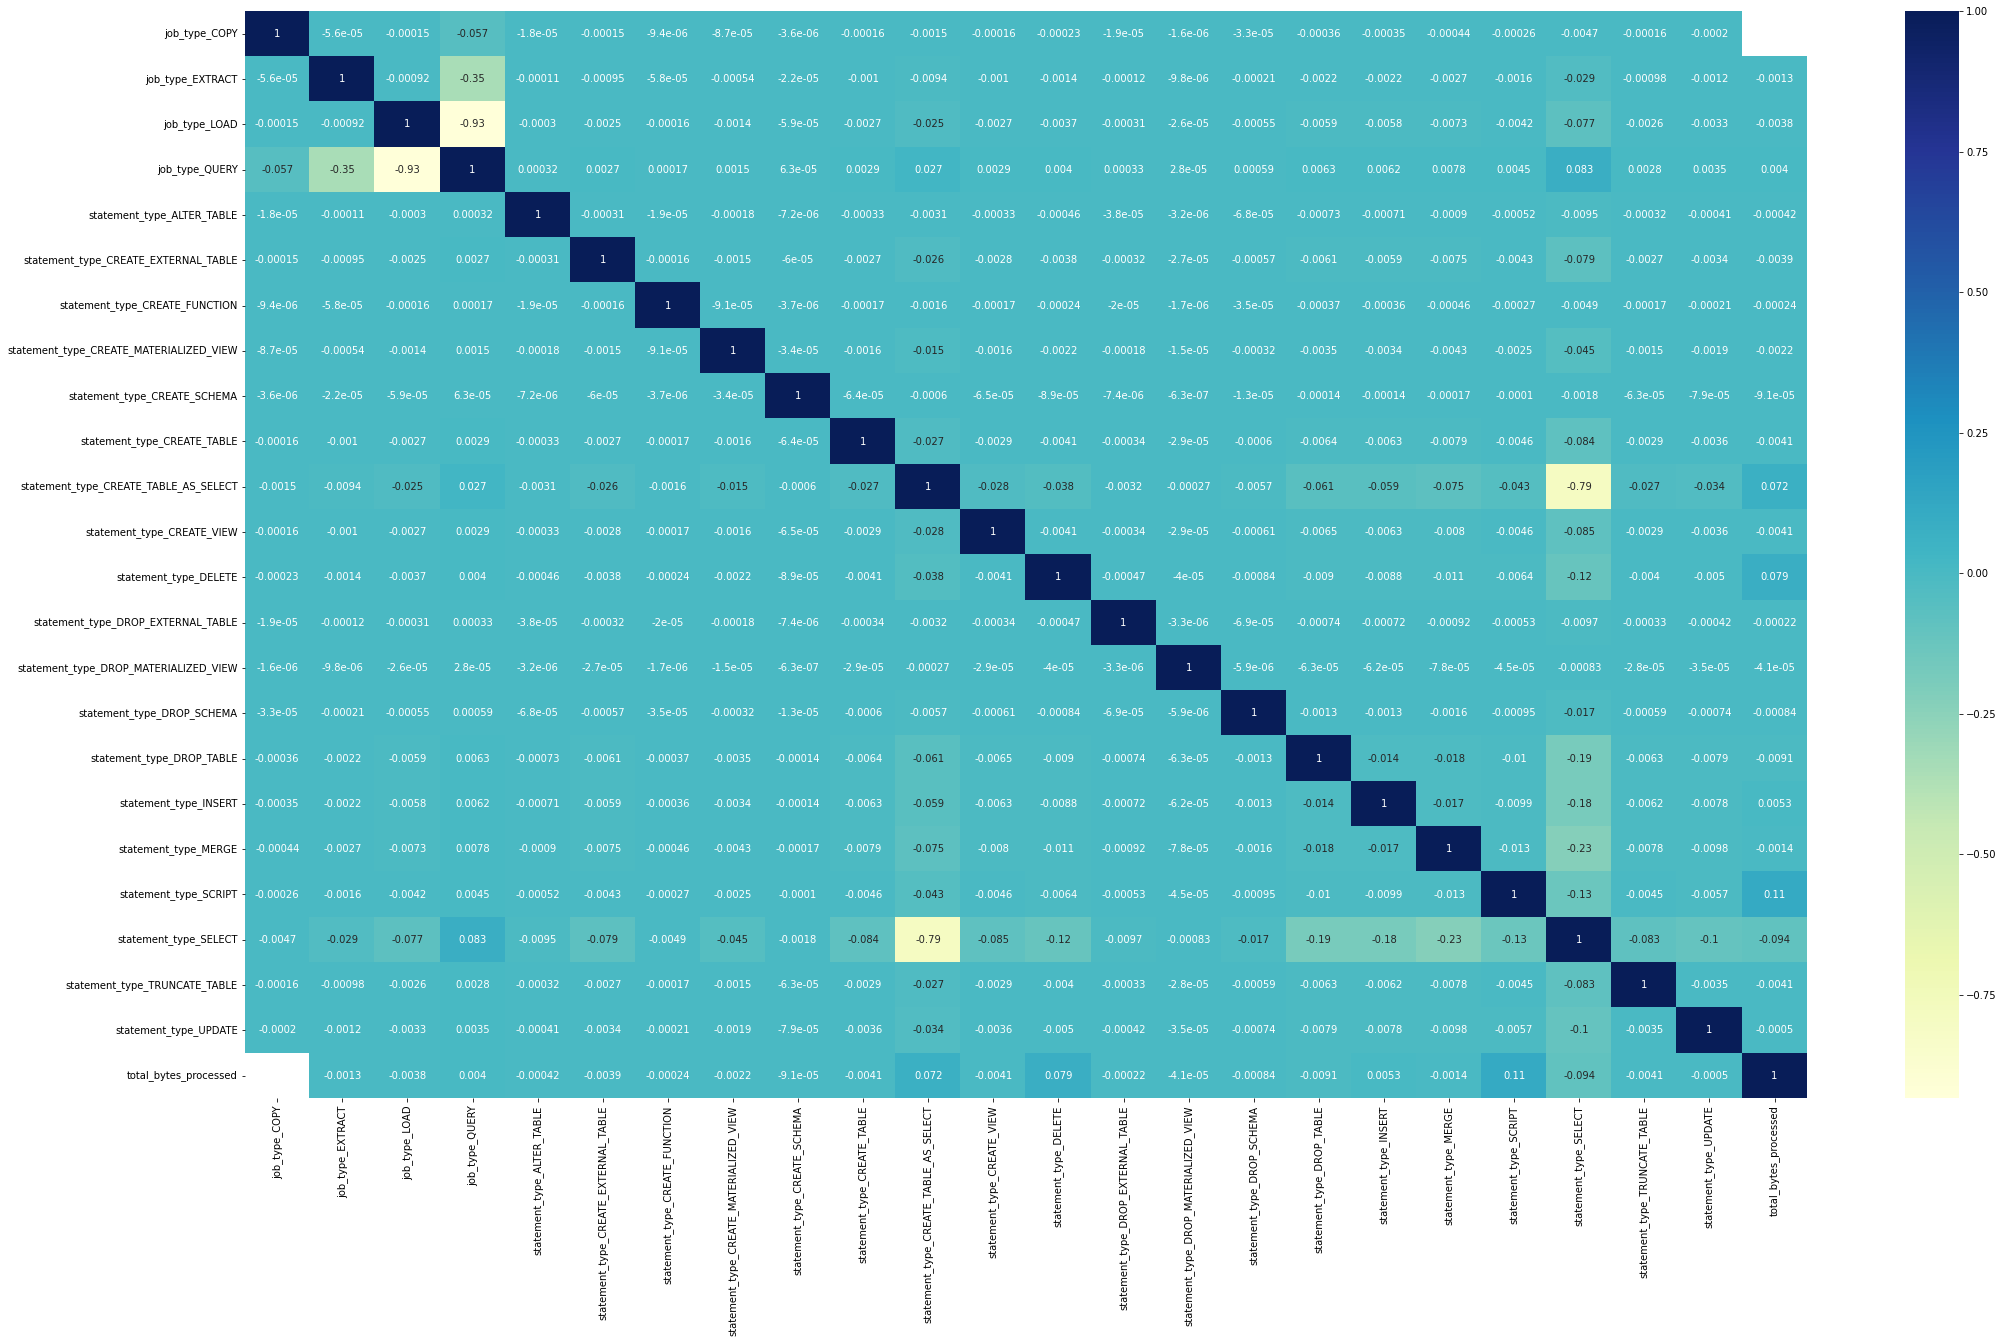

In [61]:
import matplotlib.pyplot as plt

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(35, 20)

dataplot = sb.heatmap(ohe_corr, cmap="YlGnBu", annot=True)

# Quantile analysis

In [96]:
def quantile_cost_analysis(quantile_num):
  quantile_cost = results.quantile(quantile_num)['cost_in_dollars']
  results_quantile = results[results['cost_in_dollars'] > quantile_cost]

  total_sum = results['cost_in_dollars'].sum()
  quantile_sum = results_quantile['cost_in_dollars'].sum()

  responsibility = quantile_sum / total_sum

  print(f'{(round(1 - quantile_num, 2)) * 100} % of flows account for {responsibility * 100} % of the cost in the last 6 months.')

In [97]:
for x in np.arange(0.9, 1, 0.01):
  print(quantile_cost_analysis(x))

10.0 % of flows account for 97.82636295679924 % of the cost in the last 6 months.
None
9.0 % of flows account for 96.75609859345411 % of the cost in the last 6 months.
None
8.0 % of flows account for 95.1502022142104 % of the cost in the last 6 months.
None
7.000000000000001 % of flows account for 92.93620577492617 % of the cost in the last 6 months.
None
6.0 % of flows account for 90.55462231960294 % of the cost in the last 6 months.
None
5.0 % of flows account for 88.14814125879573 % of the cost in the last 6 months.
None
4.0 % of flows account for 85.64308833942927 % of the cost in the last 6 months.
None
3.0 % of flows account for 81.87424518590076 % of the cost in the last 6 months.
None
2.0 % of flows account for 73.50288351917773 % of the cost in the last 6 months.
None
1.0 % of flows account for 60.40633449511527 % of the cost in the last 6 months.
None


# Quantitative analysis

In [100]:
daily_results = results.groupby(pd.Grouper(key='creation_time', axis=0, freq='D')).sum()

In [101]:
daily_results

,total_slot_ms,TB_billed,cost_in_dollars,total_bytes_processed,total_bytes_billed,seconds
creation_time,,,,,,
2022-06-11 00:00:00+00:00,6892210849,66.811685,334.058423,73451065941282,73460224098304,28727
2022-06-12 00:00:00+00:00,5547739707,56.923307,284.616537,62578886512766,62587838398464,23050
2022-06-13 00:00:00+00:00,10121537455,96.725634,483.628168,106334532890400,106350958870528,41223
2022-06-14 00:00:00+00:00,12207591375,85.346376,426.731882,93783046919373,93839333261312,79971
2022-06-15 00:00:00+00:00,9470903356,69.421495,347.107473,76312166295416,76329740402688,53815
...,...,...,...,...,...,...
2022-12-04 00:00:00+00:00,34919059952,201.498719,1007.493596,221509598569132,221550184759296,441350
2022-12-05 00:00:00+00:00,42019080330,257.029453,1285.147267,282558705313319,282606872559616,183505
2022-12-06 00:00:00+00:00,39636019181,384.295632,1921.478158,422483977095477,422537515237376,289568


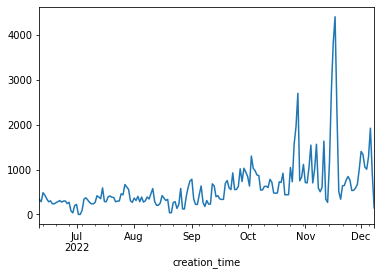

In [102]:
daily_results['cost_in_dollars'].plot()

In [115]:
daily_results_cost = daily_results[['cost_in_dollars']]

In [147]:
daily_results_cost

,cost_in_dollars
creation_time,
2022-06-11 00:00:00+00:00,334.058423
2022-06-12 00:00:00+00:00,284.616537
2022-06-13 00:00:00+00:00,483.628168
2022-06-14 00:00:00+00:00,426.731882
2022-06-15 00:00:00+00:00,347.107473
...,...
2022-12-04 00:00:00+00:00,1007.493596
2022-12-05 00:00:00+00:00,1285.147267
2022-12-06 00:00:00+00:00,1921.478158


In [154]:
daily_results_cost['sma'] = daily_results_cost['cost_in_dollars'].rolling(window=10).mean()
daily_results_cost['rstd'] = daily_results_cost['cost_in_dollars'].rolling(window=10).std()

<ipython-input-154-7aba64b6204a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_results_cost['sma'] = daily_results_cost['cost_in_dollars'].rolling(window=10).mean()
<ipython-input-154-7aba64b6204a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_results_cost['rstd'] = daily_results_cost['cost_in_dollars'].rolling(window=10).std()


In [155]:
daily_results_cost['upper_band'] = daily_results_cost['sma'] + 2 * daily_results_cost['rstd']
daily_results_cost['lower_band'] = daily_results_cost['sma'] - 2 * daily_results_cost['rstd']

<ipython-input-155-f96f630e1869>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_results_cost['upper_band'] = daily_results_cost['sma'] + 2 * daily_results_cost['rstd']
<ipython-input-155-f96f630e1869>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_results_cost['lower_band'] = daily_results_cost['sma'] - 2 * daily_results_cost['rstd']


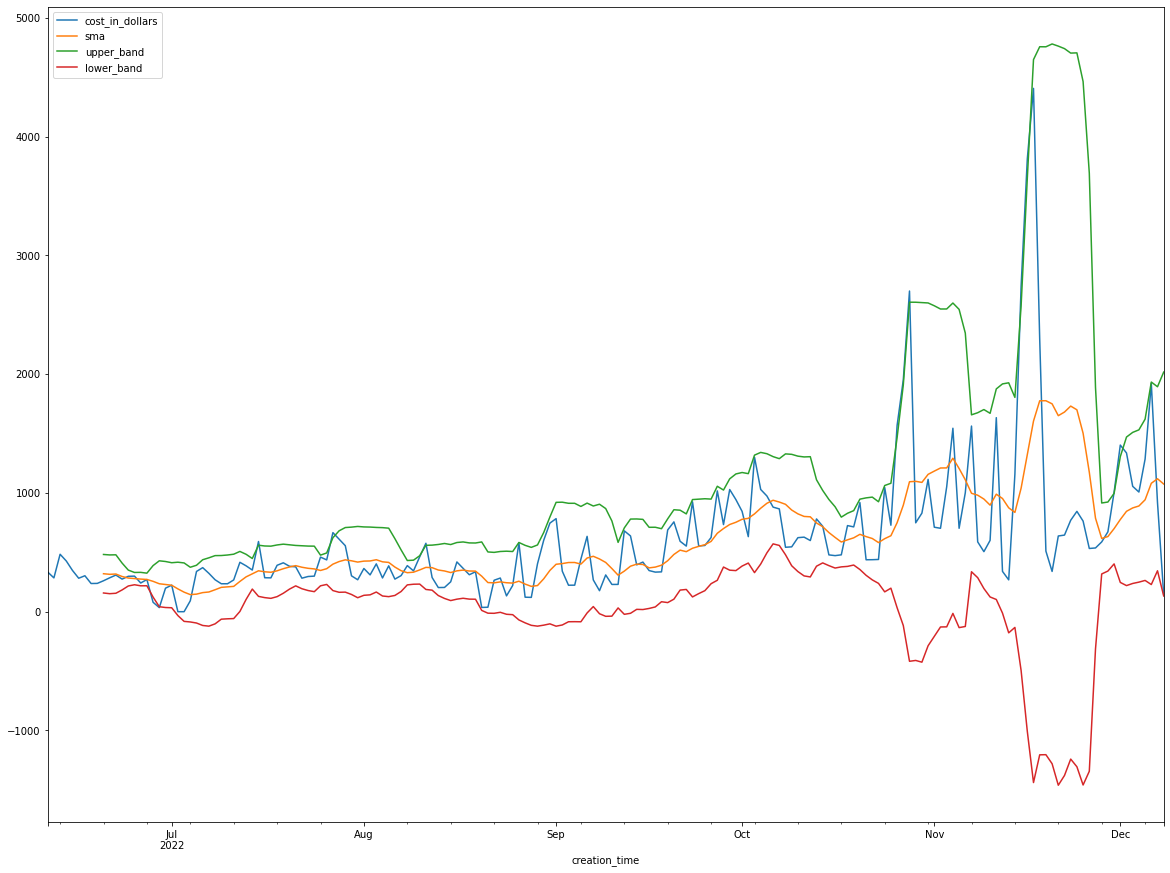

In [156]:
daily_results_cost[['cost_in_dollars', 'sma', 'upper_band', 'lower_band']].plot(figsize=(20, 15))

In [162]:
spikes = daily_results_cost[daily_results_cost['cost_in_dollars'] >= daily_results_cost['upper_band']]

In [163]:
spikes

,cost_in_dollars,sma,rstd,upper_band,lower_band
creation_time,,,,,
2022-07-15 00:00:00+00:00,590.976153,344.423380,107.680645,559.784670,129.062089
2022-07-27 00:00:00+00:00,665.846172,400.215731,111.195051,622.605833,177.825629
2022-08-11 00:00:00+00:00,576.090861,373.084681,92.930888,558.946456,187.222906
2022-10-26 00:00:00+00:00,1567.998920,749.316884,357.844178,1465.005241,33.628528
2022-10-27 00:00:00+00:00,1952.418299,896.683735,506.573312,1909.830358,-116.462889
2022-10-28 00:00:00+00:00,2700.039273,1094.189156,755.871501,2605.932157,-417.553846
2022-11-15 00:00:00+00:00,2738.977090,1039.723928,767.255915,2574.235757,-494.787901
2022-11-16 00:00:00+00:00,3811.542364,1320.701543,1163.814953,3648.331449,-1006.928362
2022-11-30 00:00:00+00:00,1006.025777,699.497590,148.521672,996.540935,402.454245


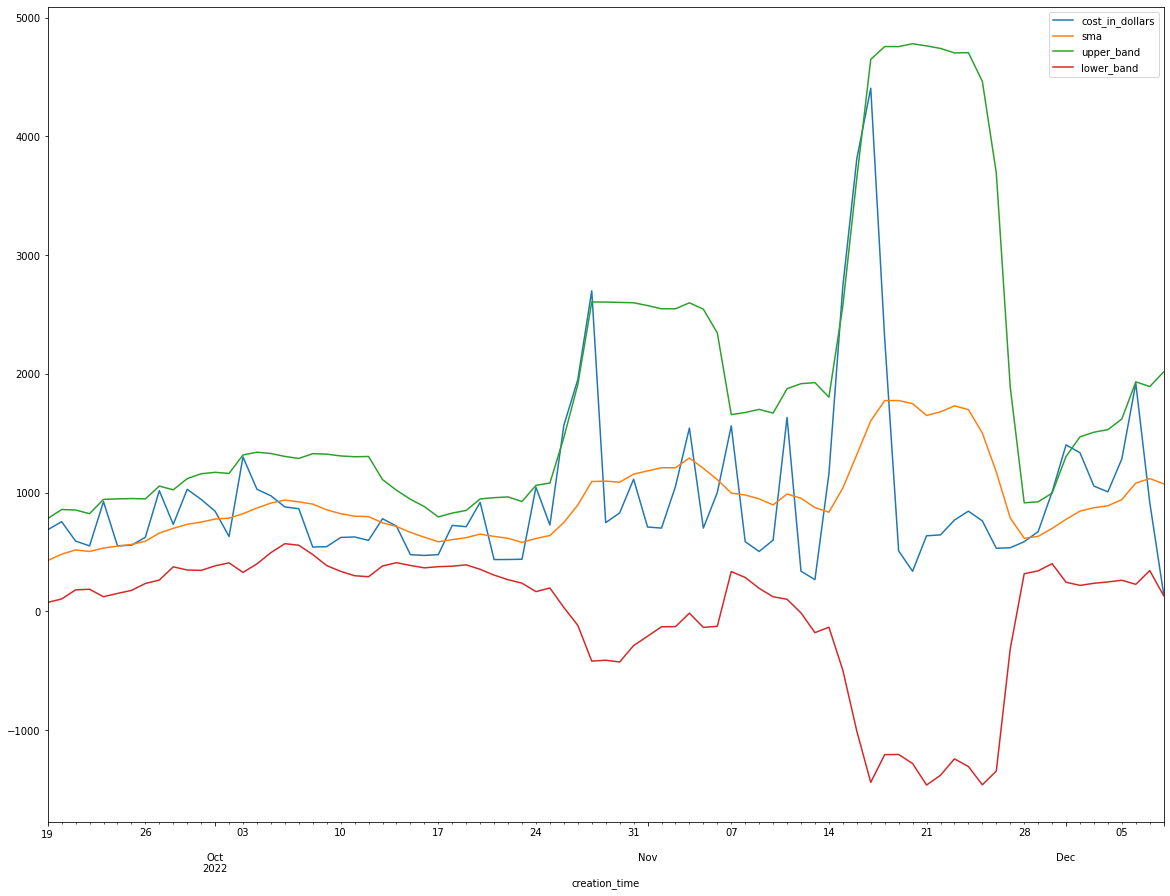

In [191]:
daily_results_cost[['cost_in_dollars', 'sma', 'upper_band', 'lower_band']].iloc[100:].plot(figsize=(20, 15))

What we are interested in is finding out which flows contribute to what. A great metric to make would be to find out exactly in a given rise of a cost or decrease in cost, which flows contributed to those.

# Flow grouping

Currently there is no effective way to identify which flows are responsible for certain jobs. I am hoping that dominiks dataset will help with that. For now we will use dataset id

I think a great metric would be to see which flows contributed to an increase or decrease in the price of a daily flow.

In [13]:
import pandas as pd
import numpy as np

In [4]:
results['date'] = results['creation_time'].dt.date

In [8]:
pivoted = pd.pivot_table(results, index='date', columns='dataset_id', values='cost_in_dollars')

In [11]:
pivoted = pivoted.fillna(0)